In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [9]:
PATH = '/content/drive/MyDrive/Project/LoL/'

In [10]:
files = ['2021-02-20', '2021-03-13']
dfs = (pd.read_csv(rf'{PATH}teamGold_{f}.csv') for f in files)
df = pd.concat(dfs, ignore_index=True)
df.head()

,gameId,platformId,gameCreation,gameDuration,winTeam,B00,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29,B30,B31,B32,B33,B34,...,R20,R21,R22,R23,R24,R25,R26,R27,R28,R29,R30,R31,R32,R33,R34,R35,R36,R37,R38,R39,R40,R41,R42,R43,R44,R45,R46,R47,R48,R49,R50,R51,R52,R53,R54,R55,R56,R57,R58,R59
0,2696218520,EUN1,1610107079251,1953,100,2500,2520,2919,4522,6395.0,8868.0,10704.0,13602.0,15652.0,17816.0,20701.0,22658.0,24849.0,28407.0,31183.0,33675.0,35888.0,37751.0,39777.0,43828.0,45970.0,46988.0,48428.0,50116.0,52652.0,54646.0,56111.0,57298.0,58848.0,60119.0,61133.0,62274.0,64644.0,66245.0,NaN,...,36384.0,40443.0,43826.0,45452.0,46463.0,48740.0,51060.0,53631.0,54845.0,58586.0,60128.0,64242.0,65630.0,66812.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5019660091,EUW1,1610083170348,1393,200,2500,2500,2959,4263,5776.0,7729.0,8929.0,10173.0,12205.0,13839.0,15782.0,19075.0,21391.0,23899.0,25540.0,26843.0,28961.0,31412.0,32550.0,34332.0,35751.0,37841.0,39544.0,41668.0,42853.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45351.0,49019.0,50864.0,55436.0,55629.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4903548900,KR,1610034019092,1590,100,2500,2500,3013,5542,6525.0,8674.0,9894.0,11700.0,14722.0,16613.0,19115.0,21886.0,25497.0,28222.0,31479.0,33698.0,35321.0,36982.0,40184.0,42621.0,44408.0,49769.0,52497.0,54909.0,57476.0,59338.0,63252.0,64650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38505.0,39471.0,41357.0,43151.0,46692.0,49419.0,50523.0,51308.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3736930681,NA1,1610198529096,1329,100,2500,2500,2900,4306,5881.0,7274.0,9769.0,11411.0,12950.0,14976.0,16618.0,18858.0,22576.0,25312.0,27010.0,29251.0,31093.0,32680.0,34229.0,39409.0,40847.0,44398.0,47650.0,47998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29974.0,31187.0,33472.0,33572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,392542622,OC1,1610149411577,1874,100,2500,2500,2938,4366,5742.0,7666.0,9207.0,11498.0,13009.0,14802.0,16296.0,18471.0,20551.0,22148.0,26932.0,28126.0,31355.0,32919.0,35761.0,38067.0,40468.0,41677.0,43442.0,45792.0,46548.0,49352.0,51636.0,53471.0,55977.0,57072.0,58478.0,62161.0,62623.0,NaN,NaN,...,31719.0,33134.0,34149.0,37118.0,39754.0,42180.0,43416.0,45176.0,47022.0,48670.0,50243.0,51892.0,52050.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.drop_duplicates(inplace=True)
len(df)

74629

In [12]:
df.sort_values(by=['platformId','gameCreation'])[['platformId', 'gameId']].to_csv(rf'{PATH}full_match_list.csv', index=False)
print('Succeeded!')

Succeeded!


In [13]:
df['winTeam'] = df['winTeam'].apply(lambda x: 'Blue' if x==100 else 'Red')
df['winTeam'].value_counts()

Red     38815
Blue    35814
Name: winTeam, dtype: int64

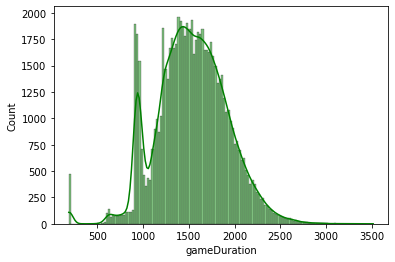

In [14]:
h = sns.histplot(df, x='gameDuration', kde=True, color='g')

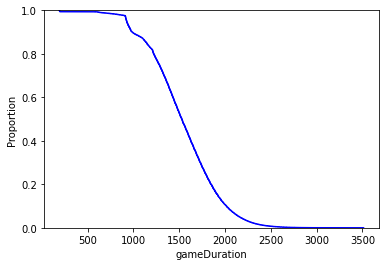

In [15]:
ax = sns.ecdfplot(df, x='gameDuration', complementary=True, color='b')

In [16]:
from bisect import bisect
x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
mm = [15,20,45,50]
for m in mm:
    i = bisect(x, 60*m)
    print(f'{y[i]:>6.2%} of the matches are longer than {m} minutes.')

97.63% of the matches are longer than 15 minutes.
82.18% of the matches are longer than 20 minutes.
 0.19% of the matches are longer than 45 minutes.
 0.02% of the matches are longer than 50 minutes.


In [17]:
df = df[df['gameDuration']>1200].copy()
len(df)

61334

In [18]:
for i in range(21):
    df[f'goldLead{i:02d}'] = df[f'B{i:02d}'] - df[f'R{i:02d}']
df.head()

,gameId,platformId,gameCreation,gameDuration,winTeam,B00,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29,B30,B31,B32,B33,B34,...,R41,R42,R43,R44,R45,R46,R47,R48,R49,R50,R51,R52,R53,R54,R55,R56,R57,R58,R59,goldLead00,goldLead01,goldLead02,goldLead03,goldLead04,goldLead05,goldLead06,goldLead07,goldLead08,goldLead09,goldLead10,goldLead11,goldLead12,goldLead13,goldLead14,goldLead15,goldLead16,goldLead17,goldLead18,goldLead19,goldLead20
0,2696218520,EUN1,1610107079251,1953,Blue,2500,2520,2919,4522,6395.0,8868.0,10704.0,13602.0,15652.0,17816.0,20701.0,22658.0,24849.0,28407.0,31183.0,33675.0,35888.0,37751.0,39777.0,43828.0,45970.0,46988.0,48428.0,50116.0,52652.0,54646.0,56111.0,57298.0,58848.0,60119.0,61133.0,62274.0,64644.0,66245.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20,-40,37,103.0,1163.0,1385.0,2415.0,2875.0,3696.0,3860.0,4533.0,4468.0,5559.0,7258.0,6995.0,6770.0,6762.0,7054.0,9912.0,9586.0
1,5019660091,EUW1,1610083170348,1393,Red,2500,2500,2959,4263,5776.0,7729.0,8929.0,10173.0,12205.0,13839.0,15782.0,19075.0,21391.0,23899.0,25540.0,26843.0,28961.0,31412.0,32550.0,34332.0,35751.0,37841.0,39544.0,41668.0,42853.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,21,-212,-508.0,-871.0,-1596.0,-2975.0,-3062.0,-3362.0,-4129.0,-3351.0,-4725.0,-4020.0,-4830.0,-7594.0,-6949.0,-7455.0,-8762.0,-9240.0,-9600.0
2,4903548900,KR,1610034019092,1590,Blue,2500,2500,3013,5542,6525.0,8674.0,9894.0,11700.0,14722.0,16613.0,19115.0,21886.0,25497.0,28222.0,31479.0,33698.0,35321.0,36982.0,40184.0,42621.0,44408.0,49769.0,52497.0,54909.0,57476.0,59338.0,63252.0,64650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,136,1239,163.0,634.0,404.0,210.0,1853.0,2150.0,3345.0,2958.0,5089.0,5996.0,6641.0,7287.0,5823.0,5297.0,6346.0,6469.0,5903.0
3,3736930681,NA1,1610198529096,1329,Blue,2500,2500,2900,4306,5881.0,7274.0,9769.0,11411.0,12950.0,14976.0,16618.0,18858.0,22576.0,25312.0,27010.0,29251.0,31093.0,32680.0,34229.0,39409.0,40847.0,44398.0,47650.0,47998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-20,-8,163,479.0,656.0,2036.0,2487.0,2528.0,2869.0,2508.0,3355.0,5033.0,6254.0,5523.0,6562.0,7268.0,6689.0,6909.0,10950.0,10873.0
4,392542622,OC1,1610149411577,1874,Blue,2500,2500,2938,4366,5742.0,7666.0,9207.0,11498.0,13009.0,14802.0,16296.0,18471.0,20551.0,22148.0,26932.0,28126.0,31355.0,32919.0,35761.0,38067.0,40468.0,41677.0,43442.0,45792.0,46548.0,49352.0,51636.0,53471.0,55977.0,57072.0,58478.0,62161.0,62623.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-15,-110,-247.0,373.0,204.0,1033.0,834.0,922.0,1192.0,1875.0,1733.0,2074.0,5222.0,4993.0,5679.0,5363.0,7239.0,8256.0,8749.0


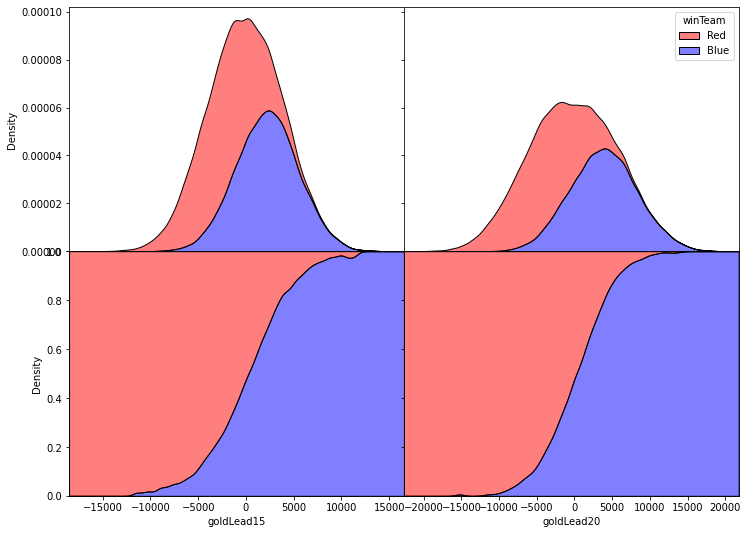

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(12,9), sharex='col', sharey='row', gridspec_kw={'wspace': 0, 'hspace':0})
_ = sns.kdeplot(data=df, x='goldLead15', hue='winTeam', multiple="stack", hue_order=['Red', 'Blue'], palette=['r','b'], ax=ax[0,0], legend=False, alpha=0.5)
_ = sns.kdeplot(data=df, x='goldLead20', hue='winTeam', multiple="stack", hue_order=['Red', 'Blue'], palette=['r','b'], ax=ax[0,1], alpha=0.5)
_ = sns.kdeplot(data=df, x='goldLead15', hue='winTeam', multiple="fill", hue_order=['Red', 'Blue'], palette=['r','b'], ax=ax[1,0], legend=False, alpha=0.5)
_ = sns.kdeplot(data=df, x='goldLead20', hue='winTeam', multiple="fill", hue_order=['Red', 'Blue'], palette=['r','b'], ax=ax[1,1], legend=False, alpha=0.5)

In [20]:
df['win'] = df['winTeam'].apply(lambda x: 1 if x=='Blue' else -1)
df.head()

,gameId,platformId,gameCreation,gameDuration,winTeam,B00,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29,B30,B31,B32,B33,B34,...,R42,R43,R44,R45,R46,R47,R48,R49,R50,R51,R52,R53,R54,R55,R56,R57,R58,R59,goldLead00,goldLead01,goldLead02,goldLead03,goldLead04,goldLead05,goldLead06,goldLead07,goldLead08,goldLead09,goldLead10,goldLead11,goldLead12,goldLead13,goldLead14,goldLead15,goldLead16,goldLead17,goldLead18,goldLead19,goldLead20,win
0,2696218520,EUN1,1610107079251,1953,Blue,2500,2520,2919,4522,6395.0,8868.0,10704.0,13602.0,15652.0,17816.0,20701.0,22658.0,24849.0,28407.0,31183.0,33675.0,35888.0,37751.0,39777.0,43828.0,45970.0,46988.0,48428.0,50116.0,52652.0,54646.0,56111.0,57298.0,58848.0,60119.0,61133.0,62274.0,64644.0,66245.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,20,-40,37,103.0,1163.0,1385.0,2415.0,2875.0,3696.0,3860.0,4533.0,4468.0,5559.0,7258.0,6995.0,6770.0,6762.0,7054.0,9912.0,9586.0,1
1,5019660091,EUW1,1610083170348,1393,Red,2500,2500,2959,4263,5776.0,7729.0,8929.0,10173.0,12205.0,13839.0,15782.0,19075.0,21391.0,23899.0,25540.0,26843.0,28961.0,31412.0,32550.0,34332.0,35751.0,37841.0,39544.0,41668.0,42853.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,21,-212,-508.0,-871.0,-1596.0,-2975.0,-3062.0,-3362.0,-4129.0,-3351.0,-4725.0,-4020.0,-4830.0,-7594.0,-6949.0,-7455.0,-8762.0,-9240.0,-9600.0,-1
2,4903548900,KR,1610034019092,1590,Blue,2500,2500,3013,5542,6525.0,8674.0,9894.0,11700.0,14722.0,16613.0,19115.0,21886.0,25497.0,28222.0,31479.0,33698.0,35321.0,36982.0,40184.0,42621.0,44408.0,49769.0,52497.0,54909.0,57476.0,59338.0,63252.0,64650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,136,1239,163.0,634.0,404.0,210.0,1853.0,2150.0,3345.0,2958.0,5089.0,5996.0,6641.0,7287.0,5823.0,5297.0,6346.0,6469.0,5903.0,1
3,3736930681,NA1,1610198529096,1329,Blue,2500,2500,2900,4306,5881.0,7274.0,9769.0,11411.0,12950.0,14976.0,16618.0,18858.0,22576.0,25312.0,27010.0,29251.0,31093.0,32680.0,34229.0,39409.0,40847.0,44398.0,47650.0,47998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-20,-8,163,479.0,656.0,2036.0,2487.0,2528.0,2869.0,2508.0,3355.0,5033.0,6254.0,5523.0,6562.0,7268.0,6689.0,6909.0,10950.0,10873.0,1
4,392542622,OC1,1610149411577,1874,Blue,2500,2500,2938,4366,5742.0,7666.0,9207.0,11498.0,13009.0,14802.0,16296.0,18471.0,20551.0,22148.0,26932.0,28126.0,31355.0,32919.0,35761.0,38067.0,40468.0,41677.0,43442.0,45792.0,46548.0,49352.0,51636.0,53471.0,55977.0,57072.0,58478.0,62161.0,62623.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-15,-110,-247.0,373.0,204.0,1033.0,834.0,922.0,1192.0,1875.0,1733.0,2074.0,5222.0,4993.0,5679.0,5363.0,7239.0,8256.0,8749.0,1


In [21]:
for i in range(1,21):
    df[f'goldDiff{i:02d}'] = abs(df[f'goldLead{i:02d}'])
    df[f'leadWin{i:02d}'] = df[['win', f'goldLead{i:02d}']].apply(lambda r: 1 if r[0]*r[1]>=0 else 0, axis=1)
df.head()

,gameId,platformId,gameCreation,gameDuration,winTeam,B00,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29,B30,B31,B32,B33,B34,...,goldDiff01,leadWin01,goldDiff02,leadWin02,goldDiff03,leadWin03,goldDiff04,leadWin04,goldDiff05,leadWin05,goldDiff06,leadWin06,goldDiff07,leadWin07,goldDiff08,leadWin08,goldDiff09,leadWin09,goldDiff10,leadWin10,goldDiff11,leadWin11,goldDiff12,leadWin12,goldDiff13,leadWin13,goldDiff14,leadWin14,goldDiff15,leadWin15,goldDiff16,leadWin16,goldDiff17,leadWin17,goldDiff18,leadWin18,goldDiff19,leadWin19,goldDiff20,leadWin20
0,2696218520,EUN1,1610107079251,1953,Blue,2500,2520,2919,4522,6395.0,8868.0,10704.0,13602.0,15652.0,17816.0,20701.0,22658.0,24849.0,28407.0,31183.0,33675.0,35888.0,37751.0,39777.0,43828.0,45970.0,46988.0,48428.0,50116.0,52652.0,54646.0,56111.0,57298.0,58848.0,60119.0,61133.0,62274.0,64644.0,66245.0,NaN,...,20,1,40,0,37,1,103.0,1,1163.0,1,1385.0,1,2415.0,1,2875.0,1,3696.0,1,3860.0,1,4533.0,1,4468.0,1,5559.0,1,7258.0,1,6995.0,1,6770.0,1,6762.0,1,7054.0,1,9912.0,1,9586.0,1
1,5019660091,EUW1,1610083170348,1393,Red,2500,2500,2959,4263,5776.0,7729.0,8929.0,10173.0,12205.0,13839.0,15782.0,19075.0,21391.0,23899.0,25540.0,26843.0,28961.0,31412.0,32550.0,34332.0,35751.0,37841.0,39544.0,41668.0,42853.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,21,0,212,1,508.0,1,871.0,1,1596.0,1,2975.0,1,3062.0,1,3362.0,1,4129.0,1,3351.0,1,4725.0,1,4020.0,1,4830.0,1,7594.0,1,6949.0,1,7455.0,1,8762.0,1,9240.0,1,9600.0,1
2,4903548900,KR,1610034019092,1590,Blue,2500,2500,3013,5542,6525.0,8674.0,9894.0,11700.0,14722.0,16613.0,19115.0,21886.0,25497.0,28222.0,31479.0,33698.0,35321.0,36982.0,40184.0,42621.0,44408.0,49769.0,52497.0,54909.0,57476.0,59338.0,63252.0,64650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,136,1,1239,1,163.0,1,634.0,1,404.0,1,210.0,1,1853.0,1,2150.0,1,3345.0,1,2958.0,1,5089.0,1,5996.0,1,6641.0,1,7287.0,1,5823.0,1,5297.0,1,6346.0,1,6469.0,1,5903.0,1
3,3736930681,NA1,1610198529096,1329,Blue,2500,2500,2900,4306,5881.0,7274.0,9769.0,11411.0,12950.0,14976.0,16618.0,18858.0,22576.0,25312.0,27010.0,29251.0,31093.0,32680.0,34229.0,39409.0,40847.0,44398.0,47650.0,47998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20,0,8,0,163,1,479.0,1,656.0,1,2036.0,1,2487.0,1,2528.0,1,2869.0,1,2508.0,1,3355.0,1,5033.0,1,6254.0,1,5523.0,1,6562.0,1,7268.0,1,6689.0,1,6909.0,1,10950.0,1,10873.0,1
4,392542622,OC1,1610149411577,1874,Blue,2500,2500,2938,4366,5742.0,7666.0,9207.0,11498.0,13009.0,14802.0,16296.0,18471.0,20551.0,22148.0,26932.0,28126.0,31355.0,32919.0,35761.0,38067.0,40468.0,41677.0,43442.0,45792.0,46548.0,49352.0,51636.0,53471.0,55977.0,57072.0,58478.0,62161.0,62623.0,NaN,NaN,...,0,1,15,0,110,0,247.0,0,373.0,1,204.0,1,1033.0,1,834.0,1,922.0,1,1192.0,1,1875.0,1,1733.0,1,2074.0,1,5222.0,1,4993.0,1,5679.0,1,5363.0,1,7239.0,1,8256.0,1,8749.0,1


In [22]:
df[[f'leadWin{i:02d}' for i in range(1,21)]].mean()

leadWin01    0.927381
leadWin02    0.527782
leadWin03    0.557978
leadWin04    0.593146
leadWin05    0.613640
leadWin06    0.626634
leadWin07    0.643183
leadWin08    0.654612
leadWin09    0.668014
leadWin10    0.681889
leadWin11    0.697476
leadWin12    0.709867
leadWin13    0.723367
leadWin14    0.734747
leadWin15    0.745525
leadWin16    0.757459
leadWin17    0.768253
leadWin18    0.779095
leadWin19    0.790703
leadWin20    0.802165
dtype: float64

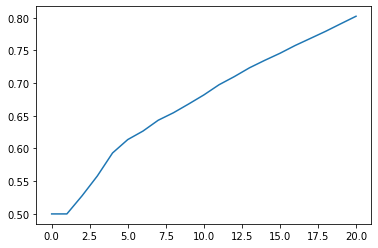

In [23]:
plt.plot([0.5,0.5]+df[[f'leadWin{i:02d}' for i in range(2,21)]].mean().tolist())
plt.show()

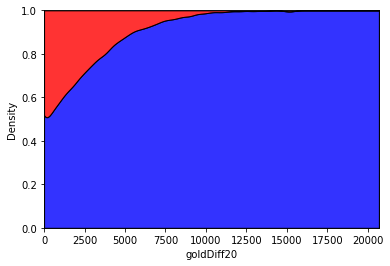

In [24]:
_ = sns.kdeplot(data=df, x='goldDiff20', hue='leadWin20', multiple="fill", hue_order=[0, 1], 
                palette=['r','b'], legend=False, alpha=0.8, clip=(0, df['goldDiff20'].max()))

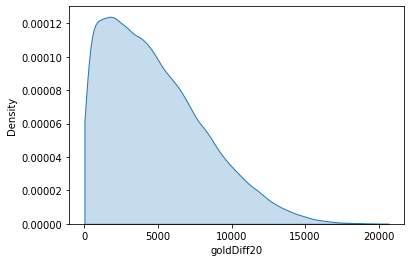

In [25]:
sns.kdeplot(data=df, x='goldDiff20', shade=True, clip=(0, df['goldDiff20'].max()))

In [26]:
df_corr = df[[f'goldLead{i:02d}' for i in range(1,21)] + ['win']]
df_corr.head()

,goldLead01,goldLead02,goldLead03,goldLead04,goldLead05,goldLead06,goldLead07,goldLead08,goldLead09,goldLead10,goldLead11,goldLead12,goldLead13,goldLead14,goldLead15,goldLead16,goldLead17,goldLead18,goldLead19,goldLead20,win
0,20,-40,37,103.0,1163.0,1385.0,2415.0,2875.0,3696.0,3860.0,4533.0,4468.0,5559.0,7258.0,6995.0,6770.0,6762.0,7054.0,9912.0,9586.0,1
1,0,21,-212,-508.0,-871.0,-1596.0,-2975.0,-3062.0,-3362.0,-4129.0,-3351.0,-4725.0,-4020.0,-4830.0,-7594.0,-6949.0,-7455.0,-8762.0,-9240.0,-9600.0,-1
2,0,136,1239,163.0,634.0,404.0,210.0,1853.0,2150.0,3345.0,2958.0,5089.0,5996.0,6641.0,7287.0,5823.0,5297.0,6346.0,6469.0,5903.0,1
3,-20,-8,163,479.0,656.0,2036.0,2487.0,2528.0,2869.0,2508.0,3355.0,5033.0,6254.0,5523.0,6562.0,7268.0,6689.0,6909.0,10950.0,10873.0,1
4,0,-15,-110,-247.0,373.0,204.0,1033.0,834.0,922.0,1192.0,1875.0,1733.0,2074.0,5222.0,4993.0,5679.0,5363.0,7239.0,8256.0,8749.0,1


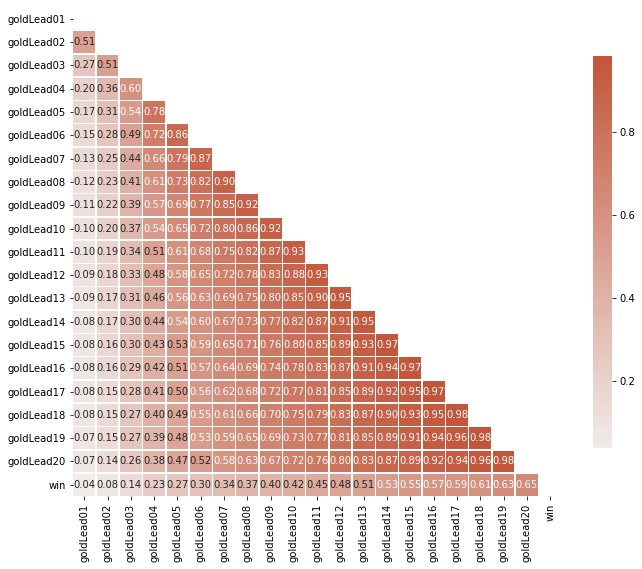

In [27]:
corr = df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

In [28]:
df_find = df[df['goldLead20'].between(4950,5050)]
df_find

,gameId,platformId,gameCreation,gameDuration,winTeam,B00,B01,B02,B03,B04,B05,B06,B07,B08,B09,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29,B30,B31,B32,B33,B34,...,goldDiff01,leadWin01,goldDiff02,leadWin02,goldDiff03,leadWin03,goldDiff04,leadWin04,goldDiff05,leadWin05,goldDiff06,leadWin06,goldDiff07,leadWin07,goldDiff08,leadWin08,goldDiff09,leadWin09,goldDiff10,leadWin10,goldDiff11,leadWin11,goldDiff12,leadWin12,goldDiff13,leadWin13,goldDiff14,leadWin14,goldDiff15,leadWin15,goldDiff16,leadWin16,goldDiff17,leadWin17,goldDiff18,leadWin18,goldDiff19,leadWin19,goldDiff20,leadWin20
601,5038947849,EUW1,1610965213191,2278,Blue,2500,2500,2849,4390,5852.0,7505.0,9488.0,11028.0,12804.0,15560.0,17342.0,20998.0,22220.0,24236.0,27683.0,29286.0,32185.0,34929.0,36473.0,38932.0,41406.0,42786.0,44710.0,46397.0,48853.0,50690.0,52602.0,53712.0,55048.0,56623.0,59137.0,63113.0,65512.0,68092.0,69673.0,...,0,1,56,0,222,0,1320.0,0,1040.0,0,1021.0,0,824.0,0,1140.0,0,471.0,1,977.0,1,2411.0,1,1626.0,1,1809.0,1,2846.0,1,1968.0,1,2721.0,1,3670.0,1,2754.0,1,3706.0,1,5011.0,1
611,5061182355,EUW1,1611924701328,1796,Blue,2500,2500,2834,4377,6235.0,8049.0,9891.0,11647.0,13918.0,15757.0,18263.0,20541.0,22435.0,24060.0,26879.0,30642.0,32827.0,34748.0,36515.0,38678.0,39859.0,42419.0,43845.0,46226.0,48948.0,52837.0,54798.0,56087.0,58994.0,61001.0,64269.0,NaN,NaN,NaN,NaN,...,0,1,33,0,349,0,334.0,1,659.0,1,879.0,1,703.0,1,874.0,1,635.0,1,1297.0,1,1516.0,1,1734.0,1,1646.0,1,3119.0,1,5796.0,1,6742.0,1,7193.0,1,6796.0,1,6022.0,1,4982.0,1
711,5032827366,EUW1,1610688026324,1418,Blue,2500,2872,3663,4842,7180.0,8859.0,9705.0,11988.0,15209.0,16962.0,19100.0,21173.0,23290.0,25637.0,28293.0,30001.0,34183.0,36890.0,38771.0,41021.0,42404.0,45366.0,48134.0,51221.0,54592.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,582,0,20,0,233,0,469.0,1,14.0,0,1344.0,0,916.0,0,1225.0,1,1110.0,1,1944.0,1,2370.0,1,3373.0,1,3214.0,1,3709.0,1,4667.0,1,6401.0,1,7293.0,1,6172.0,1,5558.0,1,4964.0,1
729,394659484,OC1,1610710197190,1374,Blue,2500,2500,2957,4384,6584.0,7949.0,9793.0,11872.0,14310.0,16378.0,19132.0,21071.0,22611.0,24909.0,28719.0,30203.0,33088.0,35212.0,37136.0,39557.0,40642.0,43188.0,44779.0,49471.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,138,1,58,1,155.0,1,464.0,0,10.0,1,327.0,1,1214.0,1,1610.0,1,3424.0,1,3865.0,1,3693.0,1,2990.0,1,5407.0,1,5029.0,1,6277.0,1,5528.0,1,6076.0,1,5514.0,1,4985.0,1
1213,3748389572,NA1,1610937960813,1219,Blue,2500,2500,2944,4455,6732.0,8245.0,9643.0,11014.0,13001.0,15005.0,17768.0,19130.0,21723.0,23553.0,25415.0,26978.0,28176.0,32665.0,33720.0,36200.0,40347.0,41637.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,0,250,0,299.0,1,351.0,0,342.0,0,944.0,0,693.0,0,311.0,0,399.0,1,118.0,0,480.0,1,274.0,0,2.0,0,39.0,1,122.0,1,2557.0,1,1180.0,1,2278.0,1,5029.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73650,5038482225,KR,1614528867153,1640,Blue,2500,2500,2894,4504,7352.0,8788.0,11198.0,13276.0,15169.0,16619.0,18062.0,20265.0,22771.0,25184.0,26925.0,28881.0,31396.0,33800.0,35959.0,38041.0,39669.0,42969.0,45297.0,48457.0,51577.0,54241.0,55874.0,59345.0,60465.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,85,0,92,1,1393.0,1,1521.0,1,2539.0,1,2904.0,1,2762.0,1,1844.0,1,2057.0,1,2072.0,1,2664.0,1,3512.0,1,2604.0,1,3144.0,1,3605.0,1,3993.0,1,4730.0,1,5827.0,1,5028.0,1
73749,412256608,OC1,1614997276493,2144,Blue,2500,2500,2917,4807,6685.0,9132.0,10374.0,11798.0,13820.0,15029.0,16982.0,18546.0,20627.0,22657.0,24415.0,27786.0,30031.0,32536.0,34778.0,35997.0,37640.0,38825.0,40646.0,41736.0,43797.0,44948.0,46492.0,47986.0,51724.0,53882.0,57143.0,58743.0,60287.0,63607.0,65940.0,...,0,1,97,0,437,1,1.0,0,790.0,1,580.0,1,621.0,1,380.0,1,151.0,1,662.0

In [29]:
df_find[df_find['winTeam']=='Red'][[f'goldLead{i:02d}' for i in range(1,21)]]

,goldLead01,goldLead02,goldLead03,goldLead04,goldLead05,goldLead06,goldLead07,goldLead08,goldLead09,goldLead10,goldLead11,goldLead12,goldLead13,goldLead14,goldLead15,goldLead16,goldLead17,goldLead18,goldLead19,goldLead20
1863,0,116,105,473.0,257.0,1433.0,1243.0,1282.0,2191.0,2577.0,2628.0,1942.0,3814.0,4847.0,5660.0,4435.0,3484.0,2825.0,3143.0,5006.0
3921,0,-57,-430,450.0,751.0,283.0,1799.0,2121.0,2077.0,2857.0,2117.0,4271.0,2774.0,3882.0,4990.0,6236.0,6451.0,5612.0,5798.0,4965.0
7031,0,90,-14,124.0,627.0,142.0,-107.0,662.0,1515.0,800.0,965.0,1940.0,2195.0,2841.0,4113.0,5298.0,5911.0,5243.0,5665.0,4987.0
7410,0,-6,-89,201.0,-17.0,-699.0,-270.0,1478.0,1146.0,966.0,2447.0,1808.0,2416.0,3436.0,2913.0,2890.0,4690.0,3794.0,4234.0,5017.0
7413,0,10,429,10.0,-369.0,-73.0,745.0,705.0,1919.0,1763.0,1906.0,2047.0,4283.0,5382.0,5416.0,5375.0,4819.0,4782.0,5458.0,4959.0
11221,0,77,187,109.0,103.0,481.0,10.0,-540.0,-420.0,280.0,872.0,497.0,1185.0,2209.0,1806.0,2398.0,2573.0,3392.0,5876.0,4966.0
13157,0,148,298,1424.0,2620.0,2817.0,2728.0,2466.0,3530.0,3283.0,2982.0,3172.0,5750.0,4657.0,3771.0,4139.0,4754.0,4887.0,4587.0,4964.0
15408,0,28,1236,1988.0,2293.0,2170.0,3353.0,3467.0,3953.0,4047.0,4119.0,4683.0,4691.0,5226.0,6616.0,5908.0,5220.0,5151.0,5272.0,4984.0
16184,0,34,-91,502.0,317.0,340.0,369.0,9.0,-476.0,-411.0,584.0,-306.0,1071.0,1465.0,1260.0,761.0,2368.0,3560.0,4419.0,4957.0
18678,0,-57,287,-247.0,-296.0,-535.0,-98.0,361.0,750.0,1201.0,1396.0,1868.0,3398.0,3337.0,4063.0,5031.0,4817.0,7010.0,6655.0,5033.0


In [30]:
df_find[df_find['winTeam']=='Blue'][[f'goldLead{i:02d}' for i in range(1,21)]].sample(50)

,goldLead01,goldLead02,goldLead03,goldLead04,goldLead05,goldLead06,goldLead07,goldLead08,goldLead09,goldLead10,goldLead11,goldLead12,goldLead13,goldLead14,goldLead15,goldLead16,goldLead17,goldLead18,goldLead19,goldLead20
65040,0,-45,-243,410.0,-235.0,602.0,157.0,-703.0,-1102.0,-419.0,365.0,554.0,1266.0,2623.0,2724.0,2756.0,3380.0,3977.0,5528.0,5036.0
37151,-125,304,119,979.0,772.0,1137.0,1919.0,672.0,286.0,1263.0,1608.0,442.0,-943.0,-887.0,-1109.0,-1870.0,-661.0,2056.0,2806.0,5042.0
42473,-20,131,484,-796.0,-549.0,-240.0,-203.0,-462.0,-788.0,-801.0,-685.0,-896.0,-113.0,499.0,1977.0,1811.0,3631.0,4604.0,4262.0,5047.0
21055,0,-49,127,280.0,273.0,247.0,300.0,-110.0,316.0,428.0,-688.0,602.0,596.0,870.0,2036.0,2757.0,2958.0,3836.0,3398.0,5040.0
5289,0,28,16,723.0,426.0,449.0,729.0,524.0,625.0,-23.0,197.0,672.0,1973.0,2368.0,4245.0,4889.0,6155.0,4810.0,4580.0,5039.0
73749,0,-97,437,-1.0,790.0,580.0,621.0,380.0,151.0,662.0,788.0,1317.0,1795.0,1275.0,3702.0,4146.0,5373.0,5253.0,4921.0,4972.0
38878,0,-37,-313,-780.0,-1076.0,-958.0,-1352.0,-1830.0,-470.0,-1200.0,-576.0,110.0,1570.0,541.0,730.0,2610.0,2892.0,1903.0,2927.0,5008.0
25785,0,111,83,384.0,-126.0,100.0,649.0,937.0,1051.0,1769.0,4433.0,2973.0,2843.0,3110.0,2696.0,4387.0,3839.0,5024.0,4955.0,4970.0
11289,0,58,-722,-1114.0,-358.0,355.0,942.0,1657.0,2321.0,2391.0,2476.0,2366.0,2504.0,2319.0,4339.0,5825.0,5816.0,4745.0,6139.0,5036.0
71618,0,-99,-576,-182.0,-353.0,11.0,14.0,1035.0,68.0,726.0,-295.0,729.0,2887.0,3759.0,3376.0,4254.0,5681.0,5961.0,5182.0,5007.0


In [31]:
win_arr = df.loc[74135][[f'goldLead{i:02d}' for i in range(21)]].to_numpy()
win_arr

array([0, 0, -104, 100, 234.0, -35.0, -14.0, 568.0, 856.0, 120.0, 1403.0,
       1046.0, 1891.0, 1104.0, 2201.0, 2473.0, 2179.0, 3680.0, 3800.0,
       4740.0, 4951.0], dtype=object)

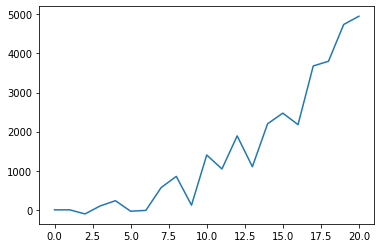

In [32]:
plt.plot(win_arr)
plt.show()

In [55]:
def plotTrend(lo,hi,target='goldLead20',title=None):
    print(f'There are {len(df[df[target].between(lo,hi)])} matches which have {target} in the range ({lo},{hi}).')
    df_ts = df[df[target].between(lo,hi)][['gameId','winTeam']+[f'goldLead{i:02d}' for i in range(21)]].melt(id_vars=['gameId','winTeam'])
    df_ts['Time'] = df_ts['variable'].apply(lambda s: int(s[-2:]))
    df_ts['Gold Lead'] = df_ts['value'].astype(int)
    ax = sns.lineplot(data=df_ts, x="Time", y="Gold Lead", hue="winTeam", hue_order=['Blue', 'Red'], palette=['b','r'])
    ax.set_title(title)
    ax.set_xlim(0,20)
    ax.set(xlabel='Time (minutes)', ylabel='Gold Lead (by the Blue team)')
    ax.get_legend().set_title("Win Team")

There are 294 matches which have goldLead20 in the range (4950,5050).


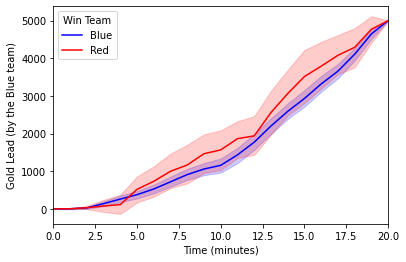

In [58]:
plotTrend(4950,5050)

There are 390 matches which have goldLead20 in the range (1950,2050).


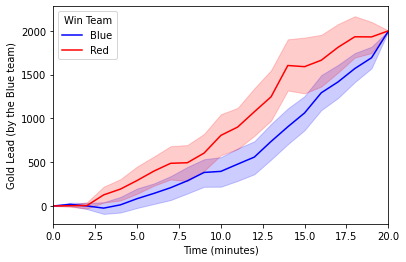

In [59]:
plotTrend(1950,2050)

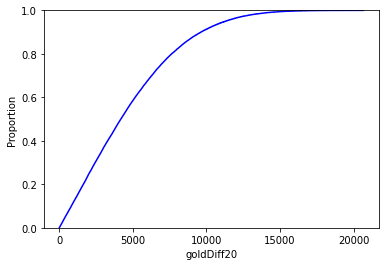

In [41]:
ax = sns.ecdfplot(df, x='goldDiff20', color='b')